## Graduate Rotational Internship Program - Data Science & Business Analytics <br> (The Sparks Foundation)

### Task 1 - Prediction using Supervised ML <br>Presented By : Bhargav Makwana

 #### Aim -  Predict the percentage of student based on the no. of study hours. <br> Dataset can be found here: <a>http://bit.ly/w-data <br> Question: What will be predicted score if a student studies for 9.25 hrs/ day?



### First of all, let's try to understand what exactly Linear Regression is.
Simple Linear Regression is a statistical method to find relationship between two continuous variables. 
Out of the two variables present, one is independent variable and the other is dependent variable. Statistical relationship is not accurate in determining relationship between two variables. 

### This relationship is defined by the famous line equation:

y = b0 + b1*x

where, y is the dependent variable, x is the independent variable,

b0 is the base value of the relationship, b1 is the slope of the line explaining the relationship between y & x.

Reference: https://towardsdatascience.com/simple-linear-regression-in-python-8cf596ac6a7c 

### Step 1: Data Acquisition

In [5]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [6]:
# Reading the dataset using Pandas
dataset = pd.read_csv('http://bit.ly/w-data')
dataset.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
# Displaying Last 5 rows using tail function
dataset.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [8]:
# Checking Number of Rows and Columns in dataset
dataset.shape

(25, 2)

In [9]:
# Describe function will only shows the integer objects, because all others are string objects  - Remember that!
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
# Checking for null values
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

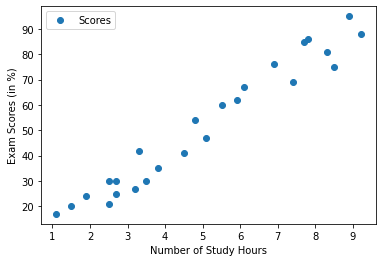

In [11]:
# Now we need to implement scattered plot to implement regression line.
dataset.plot(x='Hours', y='Scores', style='o')
plt.xlabel('Number of Study Hours')
plt.ylabel('Exam Scores (in %)')
plt.show()

In [12]:
# Here we can conclude that Exam Score is dependent variable (y) on, 
# numbers of study hours studied by the student, which is independent variable (x)

### Step 2: Data Preparation

In [13]:
# As we are using Supervised Learning, We will need input and output as Attributes and Labels in Regression
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [14]:
# We will split training and test data using sklearn's train_test_split method
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0) 

# Common split percentages include: Train: 80%, Test: 20% | Train: 67%, Test: 33% | Train: 50%, Test: 50%
# Refer the link for more information about random_state: https://www.kaggle.com/learn-forum/102258

### Step 3: Training the Machine Learning Model

In [16]:
linear_regressor = LinearRegression()  
linear_regressor.fit(X_train, y_train) 
print("Training has been successfully completed.")

Training has been successfully completed.


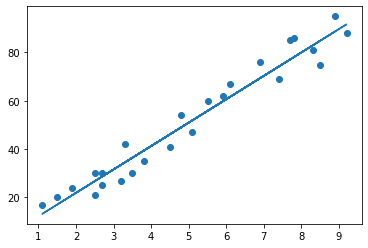

In [18]:
# According to the formula y = b0 + b1*x, we will implement regression line.
regression_line = linear_regressor.intercept_ + (linear_regressor.coef_ * X)

# Now we will plot the test data
plt.scatter(X, y)
plt.plot(X, regression_line);
plt.show()

### Step 4: Predicting the Test Data

In [23]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]
 [6.9]]


In [24]:
print(y_test)

[20 27 69 30 62 35 24 86 76]


In [22]:
y_predicted = linear_regressor.predict(X_test)

In [28]:
# Now let's compare actual values and predicated values of y
df = pd.DataFrame({'Actual Hours': y_test, 'Predicated Hours': y_predicted})
df

,Actual Hours,Predicated Hours
0,20,17.042892
1,27,33.516954
2,69,74.217577
3,30,26.733516
4,62,59.681640
5,35,39.331329
6,24,20.919142
7,86,78.093827
8,76,69.372265


### Question: What will be predicted score if a student studies for 9.25 hrs/ day?

In [53]:
given_hours = 9.25
predicted_values = linear_regressor.predict([[given_hours]])
print("Number of hours studied : {}".format(given_hours))
print("Predicted exam score = {}".format(predicted_values))

Number of hours studied : 9.25
Predicted exam score = [92.14523315]


### Step 5: Evaluation of the Model

In [59]:
# Evaluating model is must at the end because we want to know how much accurate the model is, 
# so that in later phases we can update the model to increase the accuracy and efficiency.
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test, y_predicted))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test, y_predicted))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

Mean Absolute Error:  4.6913974413974415
Mean Squared Error:  25.463280738222593
Root Mean Squared Error:  5.046115410711748
